In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Est-ce qu'un ANN peur apprendre à dire si un eleve a son bac ou pas

### Création d'un dataset d'élèves, de notes et leur résultat au bac

In [3]:
# Je veux créer une matrice avec 4 lignes(dont chacune represente une matière) 
#et 200 colonnes pour les exemples d'éleves
n_matieres   = 4
n_eleves     = 200
note_maximal = 20
X = np.random.randint(note_maximal + 1, # pour retourner des nombres entre 0 et 20 (inclus)
                      size=(n_matieres,
                            n_eleves))
X.shape

(4, 200)

In [4]:
# A partir de notre dataset X, je crée mon label Y qui renvoie aux résultats des élèves 
#c'est à dire s'ils passent le bac ou pas

# Création d'un Bac fictif
coeffs = np.array([2, 4, 2, 6])
coeffs = coeffs.reshape(4, 1)

# On calcule le score en faisant la somme des notes * coeffs pour chaque élève
scores_bac = np.dot(X.T, coeffs)

moyennes = scores_bac/np.sum(coeffs)

#Pour avoir une matrice composée de 0(si l'éleve n'a pas le bac) et 1(s'il a le bac) 
Y = (moyennes>=10)*1


Y.shape

(200, 1)

## Architecture du RNN

In [5]:
def init_parametres(n_features_x,
                    n_neuron_l1,
                    n_neuron_l2,
                    n_neuron_last):

    W1 = np.random.randn(n_features_x, n_neuron_l1)*0.01
    b1 = np.zeros((1, n_neuron_l1))
    
    
    W2 = np.random.randn(n_neuron_l1, n_neuron_l2)*0.01
    b2 = np.zeros((1, n_neuron_l2))
    
    
    W3 = np.random.randn(n_neuron_l2, n_neuron_last)*0.01
    b3 = np.zeros((1, n_neuron_last ))
    
    #creation d'un dictionnaire pour stocker les résultats de mes parametres
    parametres = {"W1" : W1,
                 "W2" : W2,
                 "W3" : W3,
                 "b1" : b1,
                 "b2" : b2, 
                 "b3" : b3}

    return parametres

In [6]:
# Mon RNN aura 3 layers: 1 input layer(3), 1, hidden layer(3) et 1 output layer(1)
#JE crée la fonction initialisation des parametres


n_fx    = X.shape[0]
n_n1    = 3
n_n2    = 3
n_nlast = 1  # On prédit deux classes donc on a besoin que d'un neurone en sortie (classif binaire)

parametres = init_parametres(n_fx, n_n1, n_n2, n_nlast)

In [7]:
parametres

{'W1': array([[-0.00898262, -0.00288675,  0.00842676],
        [-0.00100572, -0.01010176, -0.0040214 ],
        [ 0.01983592, -0.00218552,  0.00170682],
        [ 0.0009585 ,  0.00437415,  0.01523973]]),
 'W2': array([[ 0.0189718 ,  0.00303416, -0.00692667],
        [-0.01553877,  0.01647741, -0.00590973],
        [-0.00279149,  0.01256338, -0.01084168]]),
 'W3': array([[ 0.00299147],
        [-0.02065347],
        [ 0.01555095]]),
 'b1': array([[0., 0., 0.]]),
 'b2': array([[0., 0., 0.]]),
 'b3': array([[0.]])}

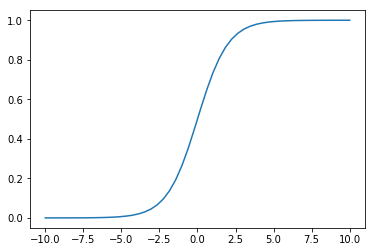

In [8]:
def sigmoid(z):
    S = 1/(1+ np.exp(-z))
    return S

ligne = np.linspace(-10,10)
plt.plot(ligne, sigmoid(ligne))

In [9]:
def forward_pass(X, parametres):
    cache = {}
    
    W1 = parametres["W1"] 
    W2 = parametres["W2"] 
    W3 = parametres["W3"] 
    b1 = parametres["b1"] 
    b2 = parametres["b1"] 
    b3 = parametres["b3"]
    
    
    Z1 = np.dot(X.T, W1)+ b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)+ b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(A2, W3)+ b3
    A3 = sigmoid(Z3)
    
    cache["Z1"] =Z1
    cache["Z2"] =Z2
    cache["Z3"] =Z3
    cache["A1"] =A1
    cache["A2"] =A2
    cache["A3"] =A3

    
    return A3, cache

In [10]:
A3, cache = forward_pass(X, parametres)
cache

{'Z1': array([[ 2.52131792e-01, -1.86794142e-01,  1.24081669e-01],
        [ 3.81155527e-01, -8.26578813e-02,  2.32029856e-01],
        [-1.37991655e-01, -1.13224255e-01,  1.47291334e-01],
        [-1.29574809e-01, -1.90048536e-01,  2.50347034e-01],
        [-4.29063526e-03, -9.19536495e-02,  2.74899656e-01],
        [ 3.87378767e-01,  8.63114636e-04,  2.11284976e-01],
        [ 1.04640287e-01, -1.07551097e-01,  3.58257487e-01],
        [ 2.03915845e-02, -2.58355269e-01,  1.49280710e-01],
        [ 2.74960247e-01, -9.30802284e-02,  1.81771298e-01],
        [-9.87911425e-02, -1.85851107e-01,  2.39750787e-01],
        [ 1.49697755e-01, -1.08873641e-01,  2.13056390e-01],
        [-2.98529272e-02, -1.81607179e-01,  1.37835866e-01],
        [ 2.34070959e-01, -7.80866374e-02,  2.16853255e-01],
        [ 2.25714477e-01, -9.47330987e-02,  3.65322906e-01],
        [ 7.48749939e-02, -1.93978795e-01,  1.27314459e-02],
        [ 2.51610286e-01, -1.12881929e-01,  3.24102111e-01],
        [-3.499882

## Calcul cost

In [11]:
def cost(A3, Y):
    #pour calculer la cost j'ai besoin du nombre d'exemples: n_eleves, de la prediction:A3, du label Y
    Loss = np.multiply(np.log(A3), Y) + (1-Y) * np.log(1-A3)
    cost = -np.sum(Loss) / n_eleves
    
    return cost

In [12]:
cost(A3, Y)

0.693243027312447

In [139]:
def backward(parametres, cache,Y ,m):
     
    
    #on recupere les parametres W1, W2, w3,
    W1 = parametres["W1"]
    W2 = parametres["W2"]
    W3 = parametres["W3"]
    
    #recuperation de A1, A2, A3 du cache
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    

    dZ3 = A3 - Y
    assert dZ3.shape == (A3.shape), (dZ3.shape, A3.shape)
    dW3 = np.dot(A2.T, dZ3)/m
    assert dW3.shape == (W3.shape), (dW3.shape, W3.shape)
    db3 = np.sum(dZ3, axis = 0, keepdims = True)/m
    assert db3.shape == (1, W3.shape[1]), (db3.shape, (1, W3.shape[1]))
   
    dZ2 = np.dot(dZ3, W3.T ) * (A2 * (1 - A2))
    assert dZ2.shape == (A2.shape), (dZ2.shape, A2.shape)
    dW2 = np.dot(dZ2.T, A2)/m
    assert dW2.shape == (W2.shape), (dW2.shape, W2.shape )
    db2 = np.sum(dZ2, axis = 0, keepdims = True)/m
    
    assert db2.shape == (1, W2.shape[1]), (db2.shape,(1, W2.shape[1]))
    dZ1 =np.dot(dZ2, W2.T) * (A1* (1 - A1))
    assert dZ1.shape == (A1.shape), (dZ1.shape, A1.shape)
    dW1 = np.dot(X, dZ1 )/m
    assert dW1.shape == W1.shape
    db1 = np.sum(dZ1, axis = 0, keepdims = True)/m
    assert db1.shape == (1, W1.shape[1])
    
    #je  stocke les resultats des dérivées de parametres dans un dictionnaire
    grads = {"dW1": dW1,
             "dW2" : dW2,
             "dW3" : dW3,
             "db1" : db1,
             "db2" : db2,
             "db3" : db3}
    
    return grads
# print(W2.T.shape, dZ2.T.shape, A1.T.shape)

In [140]:
grads = backward(parametres, cache,Y,n_eleves)
grads

{'dW1': array([[1.02283018e-05, 4.31861845e-05, 3.79114647e-05],
        [1.48936033e-05, 6.30085616e-05, 5.61906715e-05],
        [9.70480957e-06, 4.12628604e-05, 3.62863551e-05],
        [1.98017397e-05, 8.39106181e-05, 7.46281540e-05]]),
 'dW2': array([[-3.00493270e-05, -3.02846066e-05, -2.98231165e-05],
        [ 2.07448609e-04,  2.09072886e-04,  2.05886940e-04],
        [-1.56202112e-04, -1.57425140e-04, -1.55026226e-04]]),
 'dW3': array([[-0.04017999],
        [-0.04049459],
        [-0.03987751]]),
 'db1': array([[5.61918571e-07, 2.38318493e-06, 2.06733458e-06]]),
 'db2': array([[-6.00515450e-05,  4.14571995e-04, -3.12159342e-04]]),
 'db3': array([[-0.08029698]])}

## Update parametres backward

In [141]:
def update_parametres(parametres , grads, learning_rate = 0.05):
    #je recupere les parametres
    
    W1 = parametres["W1"]
    W2 = parametres["W2"]
    W3 = parametres["W3"]
    b1 = parametres["b1"]
    b2 = parametres["b2"]
    b3 = parametres["b3"]
    
    # pour recuperer les dérivées des parametres
    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    dW3 = grads["dW3"]
    db1 = grads["db1"]
    db2 = grads["db2"]
    db3 = grads["db3"]
    
    # parametrers updated
    print(dW1.shape )
    W1 = W1 - learning_rate * dW1 
    W2 = W2 - learning_rate * dW2
    W3 = W3 - learning_rate * dW3
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    b3 = b3 - learning_rate * db3
    
    #stockage parametres
    parametres = {"W1" : W1, 
                 "W2" : W2,
                 "W3" : W3,
                 "b1" : b1,
                 "b2" : b2,
                 "b3" : b3}
    return parametres

In [142]:
update_parametres(parametres , grads, learning_rate = 0.05)

(4, 3)


{'W1': array([[-0.00898313, -0.00288891,  0.00842486],
        [-0.00100647, -0.01010491, -0.00402421],
        [ 0.01983543, -0.00218758,  0.00170501],
        [ 0.00095751,  0.00436995,  0.015236  ]]),
 'W2': array([[ 0.01897331,  0.00303567, -0.00692518],
        [-0.01554914,  0.01646695, -0.00592002],
        [-0.00278368,  0.01257125, -0.01083393]]),
 'W3': array([[ 0.00500047],
        [-0.01862874],
        [ 0.01754482]]),
 'b1': array([[-2.80959286e-08, -1.19159246e-07, -1.03366729e-07]]),
 'b2': array([[ 3.00257725e-06, -2.07285998e-05,  1.56079671e-05]]),
 'b3': array([[0.00401485]])}